In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import os

import sys  
sys.path.insert(0, '../')
import ERA5_functions as era_fncts

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
lats = np.linspace(90, -90, 361)
lons = np.linspace(0, 359.5, 720)
levels = [1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100, 125, 150, 175, 200, 225, 250, 300, 350,
            400, 450, 500, 550, 600, 650, 700, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]

#times = pd.date_range('1979-01-01', '2021-12-31 18:00:00', freq='1M')

In [14]:
years = ['2019', '2020', '2021']
times = ['00', '06', '12', '18']

for year in years:
    for time in times:

        possible_file_name = f'../era5_data/strm_fncts/strm_fnct_{year}_{time}z.nc'
    
        #Check if file already exists
        if not os.path.isfile(possible_file_name):
            v_comp_data = xr.open_dataset(f'../era5_raw_data/{time}/{year}.v_component_of_wind.nc')
            strm_ds = era_fncts.calc_strm_funct(v_comp_data)
            
            strm_ds.to_netcdf(f'../era5_data/strm_fncts/strm_fnct_{year}_{time}z.nc')

In [6]:
strm_test = era_fncts.calc_strm_funct(v_comp_data)

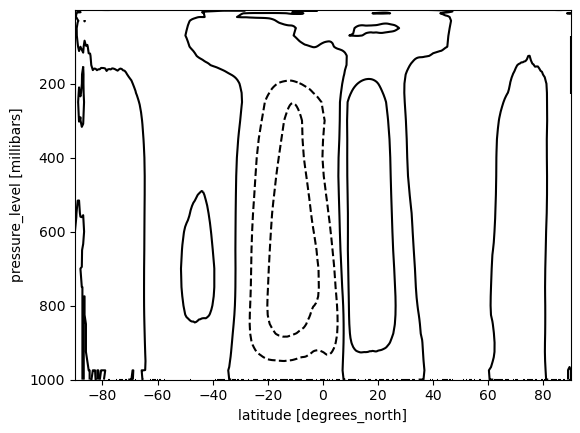

In [10]:
strm_test.mean('time').plot.contour(colors='k')

plt.gca().invert_yaxis()
plt.show()